**PCA**: Dimenssion reduction

Principal Component Analysis is a versatile and powerful technique for dimensionality reduction and feature extraction. By transforming complex, high-dimensional datasets into a more manageable form, PCA aids in data exploration, visualization, and analysis. Its mathematical underpinnings, coupled with its diverse applications, make PCA an indispensable tool in the toolkit of data scientists and analysts worldwide. Understanding the principles and mathematics behind PCA is essential for harnessing its full potential in real-world data analysis tasks.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import joblib
import itertools
from sklearn.pipeline import Pipeline

* Utils

In [45]:
def kmer_count(sequence, k=3, step=1):
    kmers = [''.join(p) for p in itertools.product('ACGT', repeat=k)]
    kmers_count = {kmer: 0 for kmer in kmers}
    s = 0
    for i in range(0, len(sequence) - k + 1, step):
        kmer = sequence[i:i + k]
        s += 1
        kmers_count[kmer] += 1
    for key, value in kmers_count.items():
        kmers_count[key] = value / s

    return kmers_count

* Load dataset

In [46]:
dataset = pd.read_csv("../Output/Arabidopsis_thaliana_GHLH_and_CYP_gene.csv")

In [47]:
k = 3
sequences   = dataset['sequence']
kmers_count = []
for i in range(len(sequences)):
    kmers_count.append(kmer_count(sequences[i], k=k, step=1))

In [48]:
v = DictVectorizer(sparse=False)
feature_values = v.fit_transform(kmers_count)
feature_names = v.get_feature_names_out()
X = pd.DataFrame(feature_values, columns=feature_names)
X.head()

,AAA,AAC,AAG,AAT,ACA,ACC,ACG,ACT,AGA,AGC,...,TCG,TCT,TGA,TGC,TGG,TGT,TTA,TTC,TTG,TTT
0,0.028758,0.018736,0.028322,0.024401,0.013508,0.008715,0.005664,0.018301,0.029630,0.012636,...,0.010022,0.025272,0.026144,0.013072,0.014815,0.016993,0.018301,0.024837,0.026144,0.043573
1,0.042148,0.015636,0.020394,0.040789,0.014956,0.004759,0.005438,0.015636,0.031271,0.007478,...,0.010197,0.035350,0.019714,0.008158,0.010877,0.010197,0.031271,0.036030,0.012916,0.062542
2,0.030108,0.019959,0.025034,0.021313,0.013532,0.008119,0.007442,0.016915,0.024357,0.011502,...,0.010487,0.032476,0.019959,0.015223,0.017591,0.022327,0.016238,0.029770,0.026725,0.046008
3,0.037222,0.016795,0.019065,0.029051,0.018157,0.009532,0.005447,0.011802,0.022696,0.006809,...,0.005901,0.024966,0.019065,0.012710,0.011348,0.020881,0.031321,0.027236,0.019519,0.059464
4,0.034068,0.019539,0.033567,0.018537,0.022044,0.011523,0.009519,0.012024,0.036072,0.014028,...,0.009018,0.028056,0.017535,0.006012,0.013026,0.019539,0.018537,0.019539,0.020541,0.049098


In [49]:
y = dataset['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

* PCA

In [50]:
# Step 1: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
# Step 2: Perform PCA
threshold = 0.95
c=int( threshold * min(4**k, X.shape[0]) )
pca = PCA(n_components=c)
X_pca = pca.fit_transform(X_scaled)

In [56]:
c

60

In [57]:
# Step 3: Explained variance
print(pca)
explained_variance = pca.explained_variance_ratio_
explained_variance_ratio = pca.explained_variance_ratio_
#print("Explained variance by each component: ", explained_variance)
#print("Cumulative explained variance: ", np.cumsum(explained_variance))
print(f"Cumulative explained variance ratio: {np.sum(explained_variance_ratio)*100}%", )

PCA(n_components=60)
Cumulative explained variance ratio: 99.99973870767867%


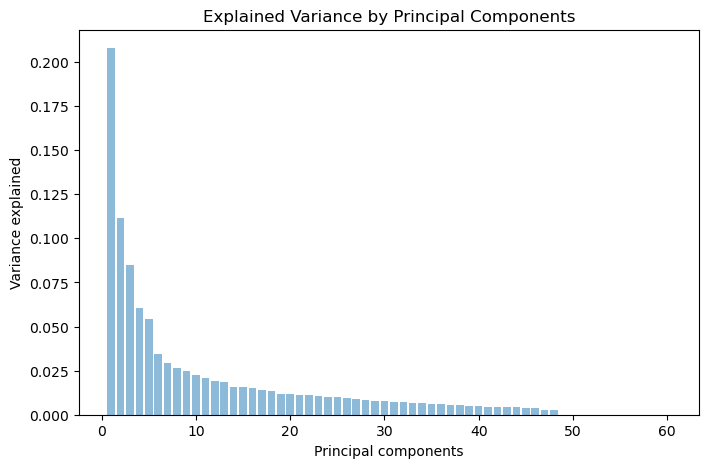

In [58]:
# Step 4: Plot the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center')
plt.ylabel('Variance explained')
plt.xlabel('Principal components')
plt.title('Explained Variance by Principal Components')
plt.show()

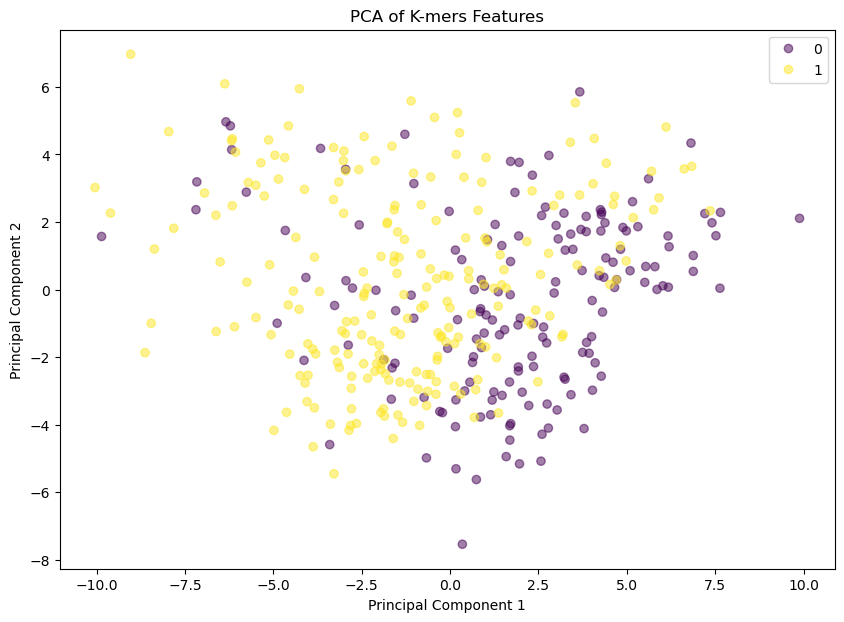

In [59]:
# Step 5: Visualize the PCA results
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of K-mers Features')
plt.legend(handles=scatter.legend_elements()[0], labels=set(y))
plt.show()

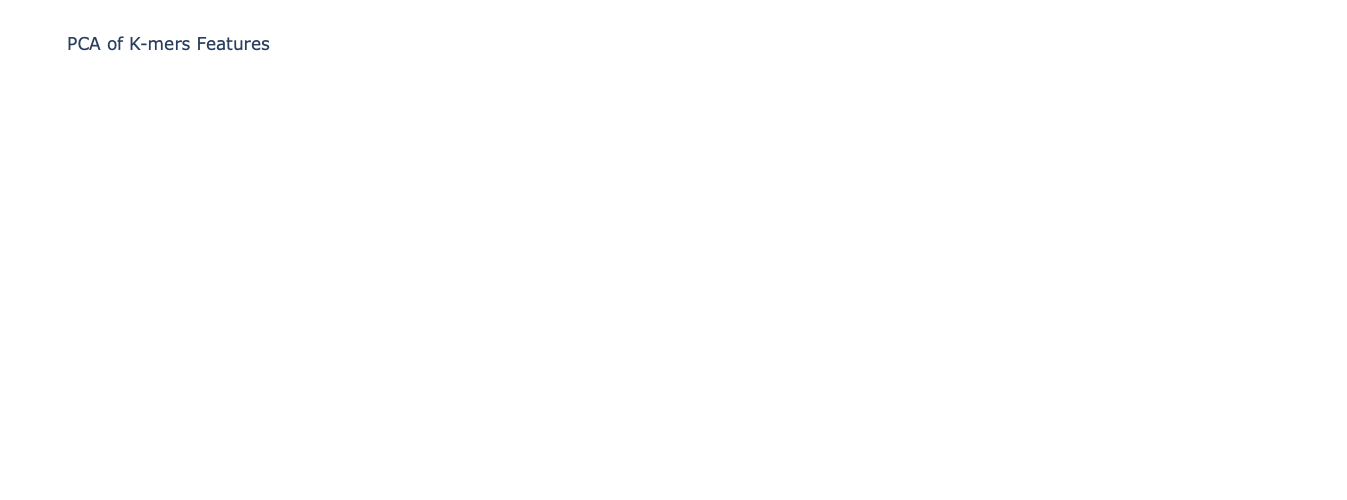

In [60]:
import plotly.graph_objs as go

fig = go.Figure(data=[go.Scatter3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    mode='markers',
    marker=dict(
        size=3,
        color=y,
        colorscale='Viridis',
        opacity=0.5
    )
)])

fig.update_layout(scene=dict(
                    xaxis_title='Component 1',
                    yaxis_title='Component 2',
                    zaxis_title='Component 3'),
                  title='PCA of K-mers Features',
                  width=1200,
                  height=500)

fig.show()

* Utils

In [61]:
def train_test(name, model, X_train, y_train, out=""):
    stratified_kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_scores = cross_val_score(model, X_train, y_train, cv=stratified_kfold, scoring='accuracy')
    print("Cross-validated accuracy: {:.4f} ± {:.4f}".format(np.mean(cv_scores), np.std(cv_scores)))

    # Fit the model
    model.fit(X_train, y_train)

    # Save
    result.append({
        'name': model.__class__.__name__,
        'model': model,
        'train_score': np.mean(cv_scores),
        'train_score_std': "±"+str(np.std(cv_scores)),
        'feature_selection_method': "PCA",
        'k-mer': k,
        'feature': "first " + str(threshold * min(4**k, X.shape[0])) + " most informative"
    })
    #df_performance = pd.DataFrame(result)
    #df_performance.to_csv(out, index=False)
    return (np.mean(cv_scores), model, name)

In [62]:
result = []
path_result=f'../Output/PCA/result_k_{k}.csv'
trained_model_history = {}
fb_model_name = None
fb_model = None
fb_score = 0

* <span style="color:red">Model 0</span>

In [76]:
model0 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=c)),
    ('clf', GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=1)))
])

In [77]:
score, model, name = train_test("GaussianProcess", model0, X, y, out=path_result)
trained_model_history[score] = [model, name]

Cross-validated accuracy: 0.8868 ± 0.0391


* <span style="color:red">Model 1</span>

In [78]:
model1 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=c)),
    ('clf', LogisticRegression())
])

In [79]:
score, model, name = train_test("LogisticRegression", model1, X, y, out=path_result)
trained_model_history[score] = [model, name]

Cross-validated accuracy: 0.8553 ± 0.0658


* <span style="color:red">Model 2</span>

In [80]:
model2 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=c)),
    ('clf', RandomForestClassifier(max_depth=128, max_features=16, n_estimators=300))
])

In [81]:
score, model, name = train_test("RandomForestClassifier", model2, X, y, out=path_result)
trained_model_history[score] = [model, name]

Cross-validated accuracy: 0.8605 ± 0.0264


* <span style="color:red">Model 3</span>

In [82]:
model3 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=c)),
    ('clf', SVC(kernel='linear',  C=0.1, gamma=0.001))
])

In [83]:
score, model, name = train_test("SVC_linear", model3, X, y, out=path_result)
trained_model_history[score] = [model, name]

Cross-validated accuracy: 0.8605 ± 0.0577


* <span style="color:red">Model 4</span>

In [84]:
model4 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=c)),
    ('clf', XGBClassifier(objective='binary:logistic', max_depth=2, n_estimators=200))
])

In [85]:
score, model, name = train_test("XGBClassifier", model4, X, y, out=path_result)
trained_model_history[score] = [model, name]

Cross-validated accuracy: 0.8211 ± 0.0788


* <span style="color:red">Model 5</span>

In [86]:
model5 = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=c)),
    ('clf', AdaBoostClassifier(algorithm="SAMME", n_estimators=200))
])

In [87]:
score, model, name = train_test("AdaBoostClassifier", model5, X, y, out=path_result)
trained_model_history[score] = [model, name]

Cross-validated accuracy: 0.8263 ± 0.0647


* **Save best method**

In [ ]:
#joblib.dump(fb_model, f'./Output/ModelPickle/k{k}_[{fb_model_name}]_basic.joblib')